# Air Temperature prediction model
Objective:
The objective of this project is to develop a machine learning model 
that can accurately predict future air temperatures based on historical observations and environmental variables.

Dataset:
The dataset consists of historical observations recorded at various locations 
over a period of time. Each observation includes information such as the year, 
month, day, date, latitude, longitude, zonal winds, meridional winds, humidity,
air temperature, and sea surface temperature.

Problem Statement:
Given the historical dataset of air temperature observations along with associated
environmental variables, the task is to train a machine learning model to predict the
air temperature at future time points. The model should be able to take input features
such as the year, month, day, latitude, longitude, zonal winds, meridional winds, and 
humidity, and output the predicted air temperature for a specified future date.

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

import os
os.chdir("D:/py/")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#algorithms
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import LogisticRegression
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC

#metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [2]:
df=pd.read_csv("elnino.csv")
df

,Observation,Year,Month,Day,Date,Latitude,Longitude,Zonal Winds,Meridional Winds,Humidity,Air Temp,Sea Surface Temp
0,1,80,3,7,800307,-0.02,-109.46,-6.8,0.7,.,26.14,26.24
1,2,80,3,8,800308,-0.02,-109.46,-4.9,1.1,.,25.66,25.97
2,3,80,3,9,800309,-0.02,-109.46,-4.5,2.2,.,25.69,25.28
3,4,80,3,10,800310,-0.02,-109.46,-3.8,1.9,.,25.57,24.31
4,5,80,3,11,800311,-0.02,-109.46,-4.2,1.5,.,25.3,23.19
...,...,...,...,...,...,...,...,...,...,...,...,...
178075,178076,98,6,11,980611,8.96,-140.33,-5.1,-0.4,94.1,26.04,28.14
178076,178077,98,6,12,980612,8.96,-140.32,-4.3,-3.3,93.2,25.8,27.87
178077,178078,98,6,13,980613,8.95,-140.34,-6.1,-4.8,81.3,27.17,27.93
178078,178079,98,6,14,980614,8.96,-140.33,-4.9,-2.3,76.2,27.36,28.03


In [3]:
df.shape

(178080, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178080 entries, 0 to 178079
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Observation        178080 non-null  int64  
 1    Year              178080 non-null  int64  
 2    Month             178080 non-null  int64  
 3    Day               178080 non-null  int64  
 4    Date              178080 non-null  int64  
 5    Latitude          178080 non-null  float64
 6    Longitude         178080 non-null  float64
 7    Zonal Winds       178080 non-null  object 
 8    Meridional Winds  178080 non-null  object 
 9    Humidity          178080 non-null  object 
 10   Air Temp          178080 non-null  object 
 11   Sea Surface Temp  178080 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 16.3+ MB


In [5]:
df.columns=[['Observation','Years','Months','Day','Date','Latitudes','Longitude','Zonal winds','Meridional winds','Humidity','Air Temperature','Sea surface temperature']]

In [6]:
df.describe(include='all')

,Observation,Years,Months,Day,Date,Latitudes,Longitude,Zonal winds,Meridional winds,Humidity,Air Temperature,Sea surface temperature
count,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000,178080,178080,178080,178080,178080
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,239,217,395,1185,1265
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,.,.,.,.,.
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25163,25162,65761,18237,17007
mean,89040.500000,93.302325,6.504869,15.720536,933689.455374,0.473626,-54.025233,NaN,NaN,NaN,NaN,NaN
std,51407.412306,3.393818,3.459657,8.800487,33900.474320,4.583041,135.363994,NaN,NaN,NaN,NaN,NaN
min,1.000000,80.000000,1.000000,1.000000,800307.000000,-8.810000,-180.000000,NaN,NaN,NaN,NaN,NaN
25%,44520.750000,92.000000,4.000000,8.000000,920116.000000,-2.010000,-154.950000,NaN,NaN,NaN,NaN,NaN
50%,89040.500000,94.000000,6.000000,16.000000,940601.000000,0.010000,-111.260000,NaN,NaN,NaN,NaN,NaN
75%,133560.250000,96.000000,10.000000,23.000000,960617.000000,4.980000,147.010000,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178080 entries, 0 to 178079
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   (Observation,)              178080 non-null  int64  
 1   (Years,)                    178080 non-null  int64  
 2   (Months,)                   178080 non-null  int64  
 3   (Day,)                      178080 non-null  int64  
 4   (Date,)                     178080 non-null  int64  
 5   (Latitudes,)                178080 non-null  float64
 6   (Longitude,)                178080 non-null  float64
 7   (Zonal winds,)              178080 non-null  object 
 8   (Meridional winds,)         178080 non-null  object 
 9   (Humidity,)                 178080 non-null  object 
 10  (Air Temperature,)          178080 non-null  object 
 11  (Sea surface temperature,)  178080 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 16.3+ MB


In [8]:
df['Zonal winds'] = df['Zonal winds'].replace('.',0).astype(float)
df['Meridional winds'] = df['Meridional winds'].replace('.',0).astype(float)
df['Humidity'] = df['Humidity'].replace('.',0).astype(float)
df['Air Temperature'] = df['Air Temperature'].replace('.',0).astype(float)
df['Sea surface temperature'] = df['Sea surface temperature'].replace('.',0).astype(float)

df['Sea surface temperature'] = df['Sea surface temperature'].replace('.',0).astype(float)
df['Air Temperature'] = df['Air Temperature'].replace('.',0).astype(float)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178080 entries, 0 to 178079
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   (Observation,)              178080 non-null  int64  
 1   (Years,)                    178080 non-null  int64  
 2   (Months,)                   178080 non-null  int64  
 3   (Day,)                      178080 non-null  int64  
 4   (Date,)                     178080 non-null  int64  
 5   (Latitudes,)                178080 non-null  float64
 6   (Longitude,)                178080 non-null  float64
 7   (Zonal winds,)              178080 non-null  float64
 8   (Meridional winds,)         178080 non-null  float64
 9   (Humidity,)                 178080 non-null  float64
 10  (Air Temperature,)          178080 non-null  float64
 11  (Sea surface temperature,)  178080 non-null  float64
dtypes: float64(7), int64(5)
memory usage: 16.3 MB


In [10]:
df.describe(include='all')

,Observation,Years,Months,Day,Date,Latitudes,Longitude,Zonal winds,Meridional winds,Humidity,Air Temperature,Sea surface temperature
count,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000,178080.000000
mean,89040.500000,93.302325,6.504869,15.720536,933689.455374,0.473626,-54.025233,-2.837802,0.214472,51.237675,24.134037,25.068441
std,51407.412306,3.393818,3.459657,8.800487,33900.474320,4.583041,135.363994,3.331297,2.780609,39.432021,8.331607,8.377468
min,1.000000,80.000000,1.000000,1.000000,800307.000000,-8.810000,-180.000000,-12.400000,-11.600000,0.000000,0.000000,0.000000
25%,44520.750000,92.000000,4.000000,8.000000,920116.000000,-2.010000,-154.950000,-5.500000,-1.400000,0.000000,25.270000,25.930000
50%,89040.500000,94.000000,6.000000,16.000000,940601.000000,0.010000,-111.260000,-3.300000,0.000000,77.000000,27.120000,28.030000
75%,133560.250000,96.000000,10.000000,23.000000,960617.000000,4.980000,147.010000,0.000000,1.900000,82.500000,28.080000,29.150000
max,178080.000000,98.000000,12.000000,31.000000,980623.000000,9.050000,171.080000,14.300000,13.000000,99.900000,31.660000,31.260000


In [11]:
df.corr()[["Air Temperature"]]

,Air Temperature
Observation,0.133793
Years,0.116889
Months,-0.013649
Day,0.000953
Date,0.116880
Latitudes,-0.015086
Longitude,-0.032852
Zonal winds,-0.021924
Meridional winds,-0.059530
Humidity,0.330587


In [12]:
df.isna().sum()

Observation                0
Years                      0
Months                     0
Day                        0
Date                       0
Latitudes                  0
Longitude                  0
Zonal winds                0
Meridional winds           0
Humidity                   0
Air Temperature            0
Sea surface temperature    0
dtype: int64

In [13]:
df.nunique()

Observation                178080
Years                          19
Months                         12
Day                            31
Date                         6371
Latitudes                     682
Longitude                    1657
Zonal winds                   238
Meridional winds              216
Humidity                      395
Air Temperature              1185
Sea surface temperature      1265
dtype: int64

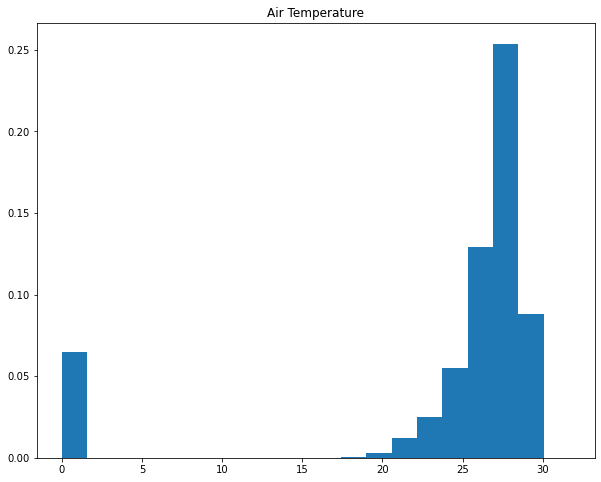

In [14]:
plt.figure(figsize=(10,8))
plt.hist(df['Air Temperature'], bins=20,density=True )
plt.title('Air Temperature')
plt.show()

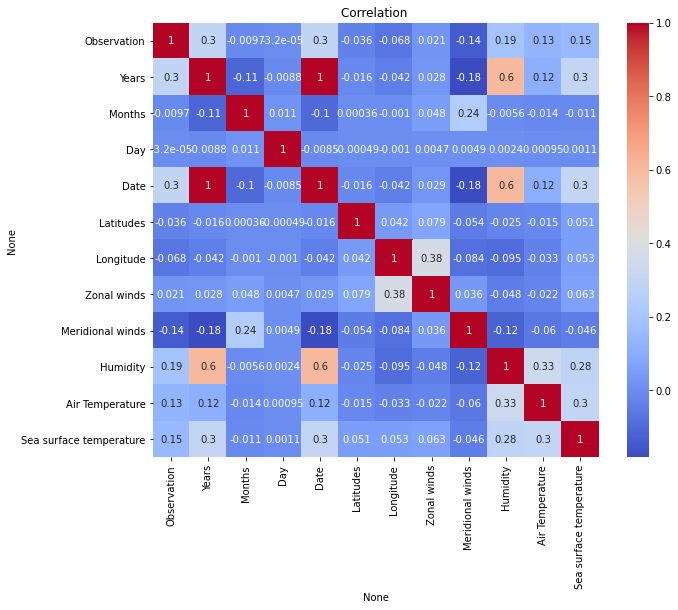

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation ')
plt.show()

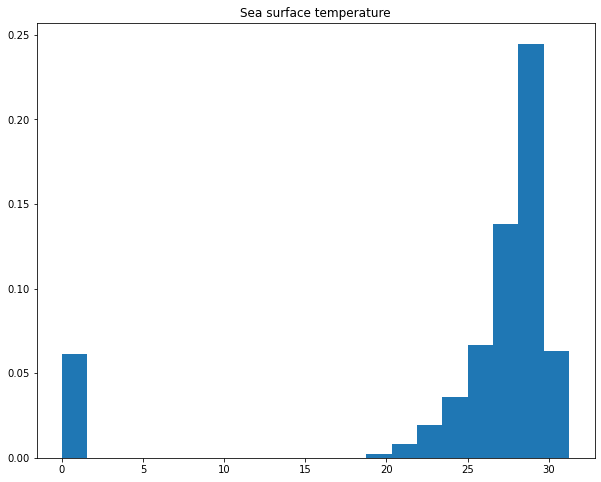

In [16]:
plt.figure(figsize=(10,8))
plt.hist(df['Sea surface temperature'], bins=20,density=True )
plt.title('Sea surface temperature')
plt.show()

In [17]:
x=df.drop(['Air Temperature'],axis=1)
y=df['Air Temperature']

In [18]:
ss=StandardScaler()

In [19]:
df_ss=pd.DataFrame(ss.fit_transform(x),columns=x.columns)
df_ss

,Observation,Years,Months,Day,Date,Latitudes,Longitude,Zonal winds,Meridional winds,Humidity,Sea surface temperature
0,-1.732041,-3.919587,-1.013071,-0.990918,-3.934542,-0.107707,-0.409525,-1.189389,0.174613,-1.299396,0.139847
1,-1.732022,-3.919587,-1.013071,-0.877287,-3.934512,-0.107707,-0.409525,-0.619039,0.318467,-1.299396,0.107617
2,-1.732002,-3.919587,-1.013071,-0.763657,-3.934483,-0.107707,-0.409525,-0.498966,0.714064,-1.299396,0.025253
3,-1.731983,-3.919587,-1.013071,-0.650027,-3.934453,-0.107707,-0.409525,-0.288837,0.606174,-1.299396,-0.090534
4,-1.731963,-3.919587,-1.013071,-0.536396,-3.934424,-0.107707,-0.409525,-0.408910,0.462320,-1.299396,-0.224226
...,...,...,...,...,...,...,...,...,...,...,...
178075,1.731963,1.384190,-0.145931,-0.536396,1.384101,1.851696,-0.637577,-0.679076,-0.220985,1.086996,0.366646
178076,1.731983,1.384190,-0.145931,-0.422766,1.384130,1.851696,-0.637503,-0.438929,-1.263925,1.064172,0.334417
178077,1.732002,1.384190,-0.145931,-0.309136,1.384160,1.849514,-0.637651,-0.979260,-1.803377,0.762386,0.341579
178078,1.732022,1.384190,-0.145931,-0.195505,1.384189,1.851696,-0.637577,-0.619039,-0.904291,0.633049,0.353516


In [20]:
x_train, x_test, y_train, y_test = train_test_split(df_ss, y, test_size=0.35, random_state=248)

In [21]:
x_train

,Observation,Years,Months,Day,Date,Latitudes,Longitude,Zonal winds,Meridional winds,Humidity,Sea surface temperature
28349,-1.180582,-0.383736,1.010257,1.281690,-0.373520,-0.107707,-0.857060,-0.198781,0.138649,0.582328,0.380970
56100,-0.640756,0.794882,-1.302118,-0.877287,0.782249,0.333049,1.552154,-0.378892,-0.400802,0.726881,0.610157
94068,0.097817,-1.562353,1.299303,-0.309136,-1.550911,0.996366,-0.413514,1.092011,2.116639,-1.299396,0.168495
1491,-1.703037,-2.151661,-1.013071,0.713538,-2.164208,-0.105525,-0.413736,-0.108726,0.174613,-1.299396,-0.004589
111211,0.431291,-1.267698,-1.591165,-1.672700,-1.285781,0.987638,1.618125,-1.099334,-1.479706,-1.299396,0.444236
...,...,...,...,...,...,...,...,...,...,...,...
84117,-0.095755,-1.267698,1.010257,-0.309136,-1.258878,-0.565920,1.617534,-1.189389,0.102686,-1.299396,0.469303
107738,0.363733,0.500227,1.299303,1.281690,0.514376,1.000730,-0.745657,0.851864,-0.077131,0.688841,0.304575
2198,-1.689284,-1.562353,-0.724024,-1.331809,-1.571825,-0.114253,-0.412406,0.161440,-0.580620,-1.299396,-0.190803
162267,1.424458,1.089536,-0.145931,-0.536396,1.089119,-1.862006,-0.412923,-1.279445,0.102686,0.638121,0.210274


In [22]:
y_train

,Air Temperature
28349,26.68
56100,27.88
94068,24.31
1491,0.00
111211,27.41
...,...
84117,28.72
107738,26.60
2198,23.01
162267,26.88


In [23]:

# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(x_train, y_train)

# Predict on the test data
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)


In [24]:
y_pred_train

array([[26.4143378 ],
       [25.9788226 ],
       [22.39058336],
       ...,
       [21.68959406],
       [26.00637985],
       [25.36173101]])

In [25]:
train_acc=r2_score(y_pred_train,y_train)
train_mse=mean_squared_error(y_pred_train,y_train)
train_rmse=train_mse**0.5
train_mae=mean_absolute_error(y_pred_train,y_train)

print('r2_score_train = ', train_acc) 
print('--'*30)
print('Mean_square_train = ', train_mse) 
print('--'*30)
print('rmse_tarin = ', train_rmse) 
print('--'*30) 
print('Mean_absolute_train = ', train_mae) 
print('--'*30)

r2_score_train =  -3.4408269829429257
------------------------------------------------------------
Mean_square_train =  56.57060301884854
------------------------------------------------------------
rmse_tarin =  7.521343165874599
------------------------------------------------------------
Mean_absolute_train =  4.641178462293192
------------------------------------------------------------


In [26]:
test_acc=r2_score(y_pred_test,y_test)
test_mse=mean_squared_error(y_pred_test,y_test)
test_rmse=test_mse**0.5
test_mae=mean_absolute_error(y_pred_test,y_test)

print('r2_score_test = ', test_acc) 
print('--'*30)
print('Mean_square_test = ', test_mse) 
print('--'*30)
print('rmse_test = ', test_rmse) 
print('--'*30) 
print('Mean_absolute_test = ', test_mae) 
print('--'*30)

r2_score_test =  -3.4421289092612017
------------------------------------------------------------
Mean_square_test =  56.82705001298954
------------------------------------------------------------
rmse_test =  7.538371840987253
------------------------------------------------------------
Mean_absolute_test =  4.643450308796404
------------------------------------------------------------


In [27]:
#uneen

In [28]:
df3=pd.read_excel("elnino_test.xlsx")
df3

,Observation,Years,Months,Day,Date,Latitudes,Longitude,Zonal winds,Meridional winds,Humidity,Sea surface temperature
0,1,80,7,7,980610,8.980000,-140.330000,-6.800000,-3.700000,0.000000,27.320000
1,2,80,7,8,980611,8.950000,-140.330000,-7.100000,-4.800000,0.000000,27.090000
2,3,80,7,9,980612,8.960000,-140.320000,-6.700000,-4.900000,0.000000,26.820000
3,4,80,7,10,980613,8.960000,-140.340000,-6.400000,-2.500000,0.000000,26.620000
4,5,80,7,11,980614,8.950000,-140.330000,-6.600000,-2.400000,0.000000,26.890000
...,...,...,...,...,...,...,...,...,...,...,...
80,81,80,9,26,980690,8.738571,-140.374286,6.297802,-1.758824,0.181409,26.964935
81,82,80,9,27,980691,8.735714,-140.374857,6.470330,-1.728186,0.003557,26.961169
82,83,80,9,28,980692,8.732857,-140.375429,6.642857,-1.697549,0.377315,26.957403
83,84,80,9,29,980693,8.730000,-140.376000,6.815385,-1.666912,0.348201,26.953636


In [29]:
y_pred1=lr.predict(df3)
y_pred1

array([[-850600.08143192],
       [-850600.46663032],
       [-850601.20669972],
       [-850602.35439119],
       [-850601.98694148],
       [-850600.74896041],
       [-850602.28247784],
       [-850600.3223829 ],
       [-850597.20846164],
       [-850597.75555226],
       [-850597.80066433],
       [-850600.49744213],
       [-850599.13868223],
       [-850601.74011419],
       [-850601.81069977],
       [-850601.99019547],
       [-850604.47892968],
       [-850604.50599982],
       [-850602.43071756],
       [-850600.70087217],
       [-850602.94275239],
       [-850601.32948677],
       [-850604.11596193],
       [-850604.3853006 ],
       [-850603.99257409],
       [-850603.8907372 ],
       [-850603.36881634],
       [-850603.85614026],
       [-850605.78563182],
       [-850604.03327031],
       [-850605.34913067],
       [-850605.48801019],
       [-850605.5838229 ],
       [-850606.47035669],
       [-850606.57455255],
       [-850605.28070835],
       [-850606.86101423],
 

In [30]:
df3['Air temp pred']=y_pred1

In [31]:
df3.head()

,Observation,Years,Months,Day,Date,Latitudes,Longitude,Zonal winds,Meridional winds,Humidity,Sea surface temperature,Air temp pred
0,1,80,7,7,980610,8.98,-140.33,-6.8,-3.7,0.0,27.32,-850600.081432
1,2,80,7,8,980611,8.95,-140.33,-7.1,-4.8,0.0,27.09,-850600.466630
2,3,80,7,9,980612,8.96,-140.32,-6.7,-4.9,0.0,26.82,-850601.206700
3,4,80,7,10,980613,8.96,-140.34,-6.4,-2.5,0.0,26.62,-850602.354391
4,5,80,7,11,980614,8.95,-140.33,-6.6,-2.4,0.0,26.89,-850601.986941


In [32]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Observation               85 non-null     int64  
 1   Years                     85 non-null     int64  
 2   Months                    85 non-null     int64  
 3    Day                      85 non-null     int64  
 4    Date                     85 non-null     int64  
 5   Latitudes                 85 non-null     float64
 6    Longitude                85 non-null     float64
 7    Zonal winds              85 non-null     float64
 8    Meridional winds         85 non-null     float64
 9    Humidity                 85 non-null     float64
 10   Sea surface temperature  85 non-null     float64
 11  Air temp pred             85 non-null     float64
dtypes: float64(7), int64(5)
memory usage: 8.1 KB


In [33]:



def prediction_temp(precess,model):  # Added model as a parameter
    # Collect user input
    Observation = int(input('Enter Observation: '))
    Years = int(input('Enter Year: '))
    Months = int(input('Enter Months: '))
    Day = int(input('Enter Day: '))
    Date = int(input('Enter Date: '))
    Latitudes = float(input('Enter Latitudes: '))
    Longitude = float(input('Enter Longitude(-): '))
    Zonal_winds = float(input('Enter Zonal winds(-): '))
    Meridional_winds = float(input('Enter Meridional winds: '))
    Humidity = float(input("Enter Humidity: "))
    Sea_Surface_temperature = float(input('Enter Sea surface temperature: '))

    temp_data = {
        'Observation': [Observation],
        'Years': [Years],
        'Months': [Months],
        'Day': [Day],
        'Date': [Date],
        'Latitudes': [Latitudes],
        'Longitude': [Longitude],
        'Zonal_winds': [Zonal_winds],
        'Meridional_winds': [Meridional_winds],
        'Humidity' : [Humidity],
        'Sea_Surface_temperature': [Sea_Surface_temperature]
    }

    df_pred = pd.DataFrame(temp_data)

    # Transform data
    preth = pd.DataFrame(precess.fit_transform(df_pred), columns=df_pred.columns)  # Preserve column names

    # Prediction
    prediction = model.predict(preth)

    # Add prediction to DataFrame
    df_pred['Air_Temperature'] = prediction
    
    return df_pred

In [34]:
prediction_temp(ss,lr)

Enter Observation: 192242
Enter Year: 102
Enter Months: 7
Enter Day: 31
Enter Date: 1042342
Enter Latitudes: 9.23
Enter Longitude(-): -140.89
Enter Zonal winds(-): -8.1
Enter Meridional winds: -2.4
Enter Humidity: 99.12
Enter Sea surface temperature: 33.34


,Observation,Years,Months,Day,Date,Latitudes,Longitude,Zonal_winds,Meridional_winds,Humidity,Sea_Surface_temperature,Air_Temperature
0,192242,102,7,31,1042342,9.23,-140.89,-8.1,-2.4,99.12,33.34,24.142053


In [35]:
prediction_temp(ss,lr)

Enter Observation: 1023134
Enter Year: 121
Enter Months: 9
Enter Day: 5
Enter Date: 1203453
Enter Latitudes: 10.53
Enter Longitude(-): -142.43
Enter Zonal winds(-): -12.4
Enter Meridional winds: -6.3
Enter Humidity: 104.53
Enter Sea surface temperature: 34.23


,Observation,Years,Months,Day,Date,Latitudes,Longitude,Zonal_winds,Meridional_winds,Humidity,Sea_Surface_temperature,Air_Temperature
0,1023134,121,9,5,1203453,10.53,-142.43,-12.4,-6.3,104.53,34.23,24.142053
